In [1]:
import numpy as np
from sklearn.manifold import TSNE
import torch
from transformers import BertConfig, BertModel, BertTokenizer
from transformers import BertForMaskedLM, BertTokenizerFast, pipeline
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

/home/customer/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [2]:
config = BertConfig.from_json_file("config.json")
model = BertForMaskedLM.from_pretrained('/home/customer/hyr/matbert-uncased（copy-version）')
tokenizer = BertTokenizerFast.from_pretrained('/home/customer/hyr/matbert-uncased（copy-version）', do_lower_case=False)
# unmasker = pipeline('fill-mask', model=model, tokenizer=tokenizer)

In [3]:
# # 提取和'perovskite'余弦值相似性最高的1000个词语
# perovskite_vector = model.base_model.embeddings.word_embeddings.weight[tokenizer.convert_tokens_to_ids('perovskite')].detach().numpy()
# word_embeddings = model.base_model.embeddings.word_embeddings.weight.detach().numpy()
# cos_similarities = np.dot(word_embeddings, perovskite_vector) / (np.linalg.norm(word_embeddings, axis=1) * np.linalg.norm(perovskite_vector))


# 分界线--------------------------
word_vector = model.base_model.embeddings.word_embeddings.weight[tokenizer.convert_tokens_to_ids('perovskite')].detach().numpy()
word_embeddings = model.base_model.embeddings.word_embeddings.weight.detach().numpy()
cos_similarities = np.dot(word_embeddings, word_vector) / (np.linalg.norm(word_embeddings, axis=1) * np.linalg.norm(word_vector))


In [15]:
# 提取前最相似的词
# top_indices = np.argsort(cos_similarities)[-20000:]
# similar_words = [tokenizer.convert_ids_to_tokens(int(index)) for index in top_indices]

# -------------------分界线

# top_indices = np.argsort(cos_similarities)
top_indices = np.argsort(cos_similarities)[::-1]
similar_words = [tokenizer.convert_ids_to_tokens(int(index)) for index in top_indices]

In [11]:
# 提取这些词语的向量
vectors = [word_embeddings[int(index)] for index in top_indices]

In [12]:

from umap import UMAP

# 使用UMAP进行降维
reducer = UMAP()
umap_embeddings = reducer.fit_transform(vectors)

<Figure size 3000x2400 with 0 Axes>

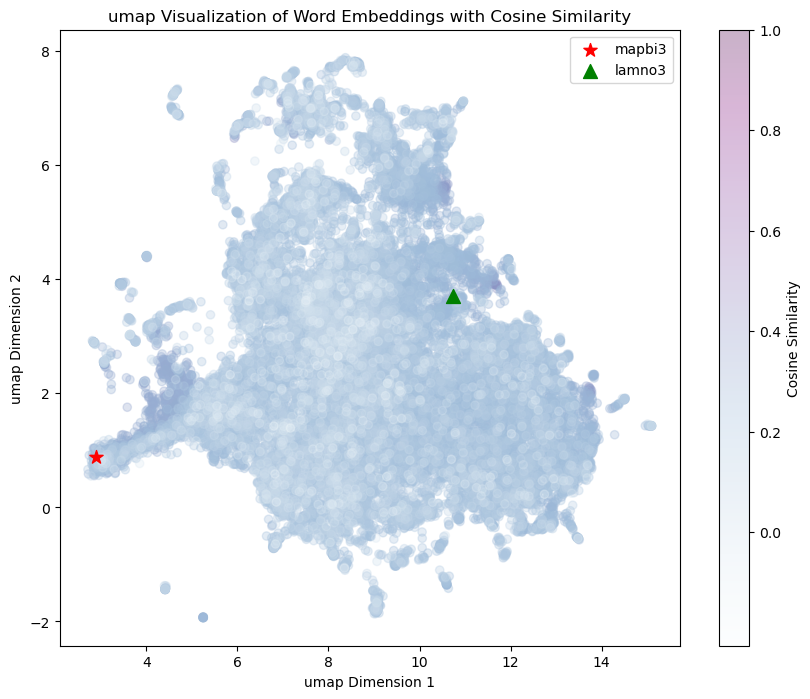

In [30]:

word1_index = similar_words.index('mapbi3')
word2_index= similar_words.index('lamno3')
plt.figure(figsize=(10, 8), dpi=300)
cmap = plt.cm.BuPu
# 可视化词向量图
plt.figure(figsize=(10, 8))


# 绘制所有词向量的散点图，并根据余弦相似度值着色
scatter = plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c= cos_similarities[top_indices], cmap=cmap, alpha=0.3)

# 标记 "aminoguanidine" 和 "additive"
plt.scatter(umap_embeddings[word1_index, 0], umap_embeddings[word1_index, 1], c='red', marker='*', s=100, label='mapbi3')
plt.scatter(umap_embeddings[word2_index, 0], umap_embeddings[word2_index, 1], c='green', marker='^', s=100, label='lamno3')

plt.xlabel('umap Dimension 1')
plt.ylabel('umap Dimension 2')
plt.title('umap Visualization of Word Embeddings with Cosine Similarity')
plt.legend()

# 添加颜色条
cbar = plt.colorbar(scatter)
cbar.set_label('Cosine Similarity')

# 设置颜色条的范围，使其只显示蓝色部分
cbar.set_ticks(np.linspace(0, 1, 6))


plt.savefig('perovskite.png')  # 可以将文件名修改为您想要的文件名和路径

plt.show()

In [31]:
for index in top_indices:
    word = tokenizer.convert_ids_to_tokens(int(index))
    similarity = cos_similarities[index]
    print(f"{word}: {similarity}")


perovskite: 0.9999999403953552
perovskites: 0.7826675176620483
mapbi3: 0.504774808883667
ch3nh3pbi3: 0.4945979118347168
pyrochlore: 0.487924724817276
spinel: 0.4787881374359131
perovsk: 0.4380456507205963
lamno3: 0.43694406747817993
fluorite: 0.4357050955295563
octahedra: 0.4288794994354248
pbi2: 0.42557504773139954
##bi3: 0.4234254062175751
ch3nh3: 0.4203873872756958
ilmenite: 0.41728031635284424
rutile: 0.41250649094581604
##feo3: 0.4114798307418823
spinels: 0.40823495388031006
batio3: 0.4055382311344147
srtio3: 0.40195485949516296
corundum: 0.4011254906654358
pscs: 0.3995141088962555
bifeo3: 0.3994349539279938
pbtio3: 0.399434894323349
##pbi3: 0.39778658747673035
chalcopyrite: 0.3960486352443695
lanthanum: 0.3934275805950165
lscf: 0.39229661226272583
octahedron: 0.39220041036605835
manganites: 0.3864652216434479
laalo3: 0.38543105125427246
multiferroic: 0.38344934582710266
ferroelectrics: 0.38282570242881775
la0: 0.38171058893203735
olivine: 0.3816084563732147
clinopyroxene: 0.38133

In [36]:
# # 对词向量进行降维
# # reducer = UMAP()
# # umap_embeddings = reducer.fit_transform(word_embeddings)
# reducer = UMAP(n_neighbors=10, n_components=2, min_dist=0.1)
# umap_embeddings = reducer.fit_transform(word_embeddings)

In [35]:
# # 创建一个大小为 (10, 8) 的图形，并设置 DPI 为 300
# plt.figure(figsize=(10, 8), dpi=300)

# # 设置 x 轴和 y 轴的范围
# plt.xlim(1, 5)
# plt.ylim(9, 10)


# # 绘制其余词向量的散点图，并将颜色设置为灰色
# plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], color='gray', alpha=0.5)

# # 绘制高亮词汇的散点图
# highlight_words = ['perovskite', 'mapbi3', 'lamno3']  # 需要高亮的词汇列表
# for word in highlight_words:
#     index = similar_words.index(word)
#     plt.scatter(umap_embeddings[index, 0], umap_embeddings[index, 1], color='red', marker='*', s=100, label=word)

    
# # 'o': 圆圈
# # 's': 正方形
# # '+': 加号
# # 'x': 叉号
# # 'd': 菱形
# # 'v': 倒三角形
# # '^': 正三角形
# # '<': 左三角形
# # '>': 右三角形
# # 'p': 五边形
# # 'h': 六边形


# # 设置 x 轴和 y 轴的标签
# plt.xlabel('UMAP Dimension 1')
# plt.ylabel('UMAP Dimension 2')

# # 设置图的标题
# plt.title('UMAP Visualization of Word Embeddings')

# # 显示图例
# plt.legend()

# # 保存图像并显示
# plt.savefig('allword.png')
# plt.show()